In [ ]:
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

In [ ]:
df=pd.read_csv(r"/content/customer_churn_dataset-testing-master.csv")

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [ ]:
df.info()### no need to fill the nan (as no missing values in the data set)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  object
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.4+ MB


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})## encode the male and female --> (1,0)

In [ ]:
df['Gender']

,Gender
0,0
1,0
2,1
3,1
4,0
...,...
64369,0
64370,1
64371,1
64372,0


In [ ]:
df = pd.get_dummies(df, columns=['Subscription Type'], drop_first=True)### create an catagorial column for each type of subscription

In [ ]:
df.head().T

,0,1,2,3,4
Age,22,41,47,35,53
Gender,0,0,1,1,0
Tenure,25,28,27,9,58
Usage Frequency,14,28,10,12,24
Support Calls,4,7,2,5,9
Payment Delay,27,13,29,17,2
Contract Length,Monthly,Monthly,Annual,Quarterly,Annual
Total Spend,598,584,757,232,533
Last Interaction,9,20,21,18,18
Churn,1,0,0,0,0


In [ ]:
df = pd.get_dummies(df, columns=['Contract Length'], drop_first=True)

In [ ]:
df.head().T

,0,1,2,3,4
Age,22,41,47,35,53
Gender,0,0,1,1,0
Tenure,25,28,27,9,58
Usage Frequency,14,28,10,12,24
Support Calls,4,7,2,5,9
Payment Delay,27,13,29,17,2
Contract Length,Monthly,Monthly,Annual,Quarterly,Annual
Total Spend,598,584,757,232,533
Last Interaction,9,20,21,18,18
Churn,1,0,0,0,0


In [ ]:
X = df.drop(columns=['Churn']).values
y = df['Churn'].values

In [ ]:
X

array([[22, 0, 25, ..., False, True, False],
       [41, 0, 28, ..., True, True, False],
       [47, 1, 27, ..., False, False, False],
       ...,
       [25, 1, 39, ..., False, True, False],
       [50, 0, 18, ..., True, True, False],
       [52, 0, 45, ..., True, True, False]], dtype=object)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[8305 1829]
 [1623 7556]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     10134
           1       0.81      0.82      0.81      9179

    accuracy                           0.82     19313
   macro avg       0.82      0.82      0.82     19313
weighted avg       0.82      0.82      0.82     19313



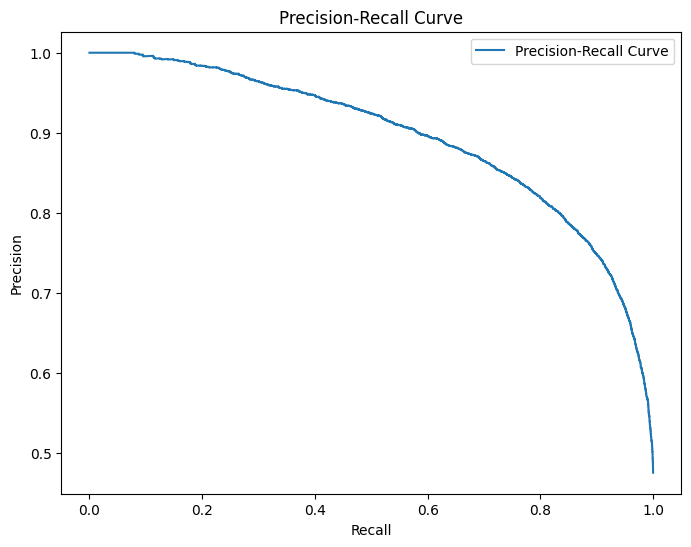

In [ ]:
# Standardize numerical columns: 'Tenure', 'Total Spend', 'Contract Length', 'Age'
scaler = StandardScaler()
X[:, [0, 1, 2, 4]] = scaler.fit_transform(X[:, [0, 1, 2, 4]])

# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation: Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization: Precision-Recall Curve
y_scores = model.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

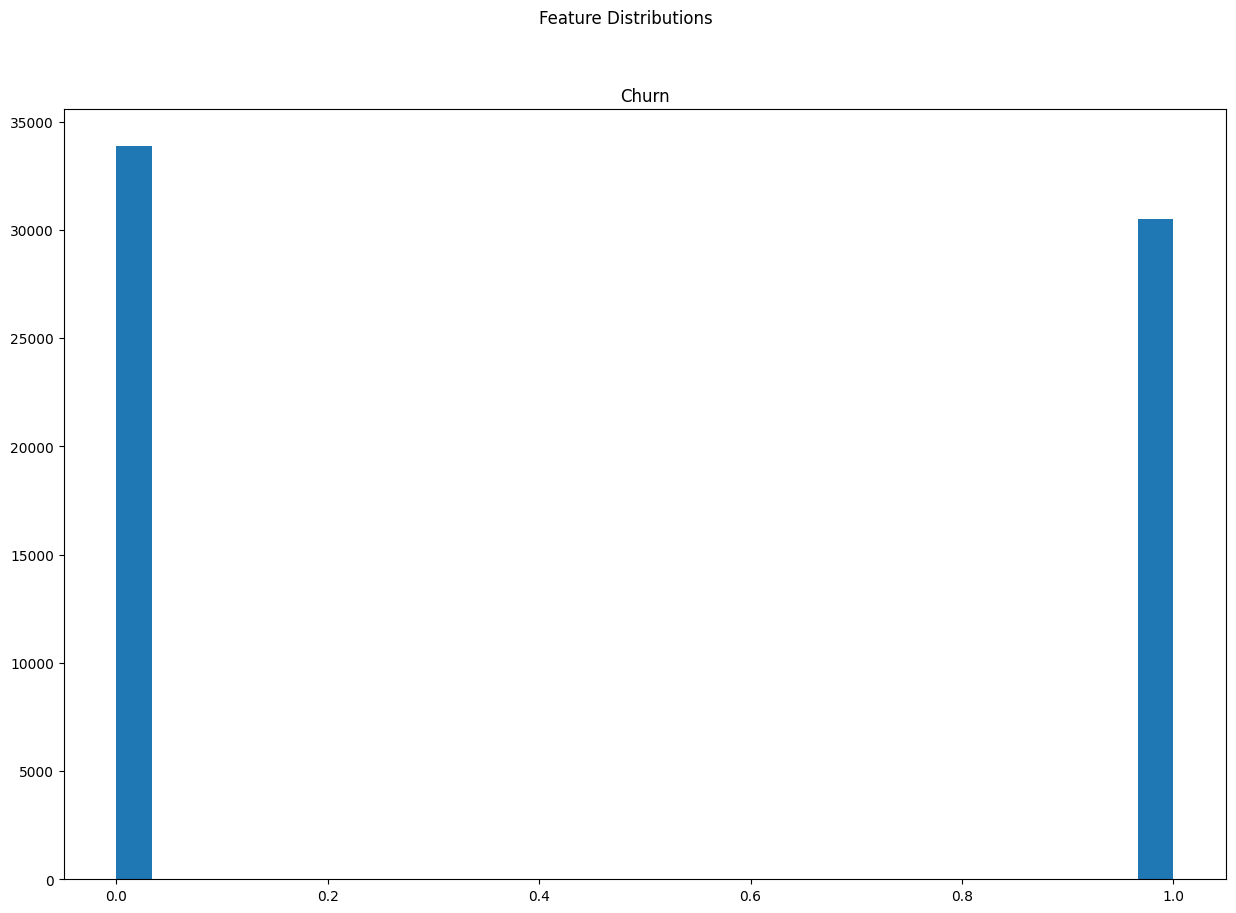

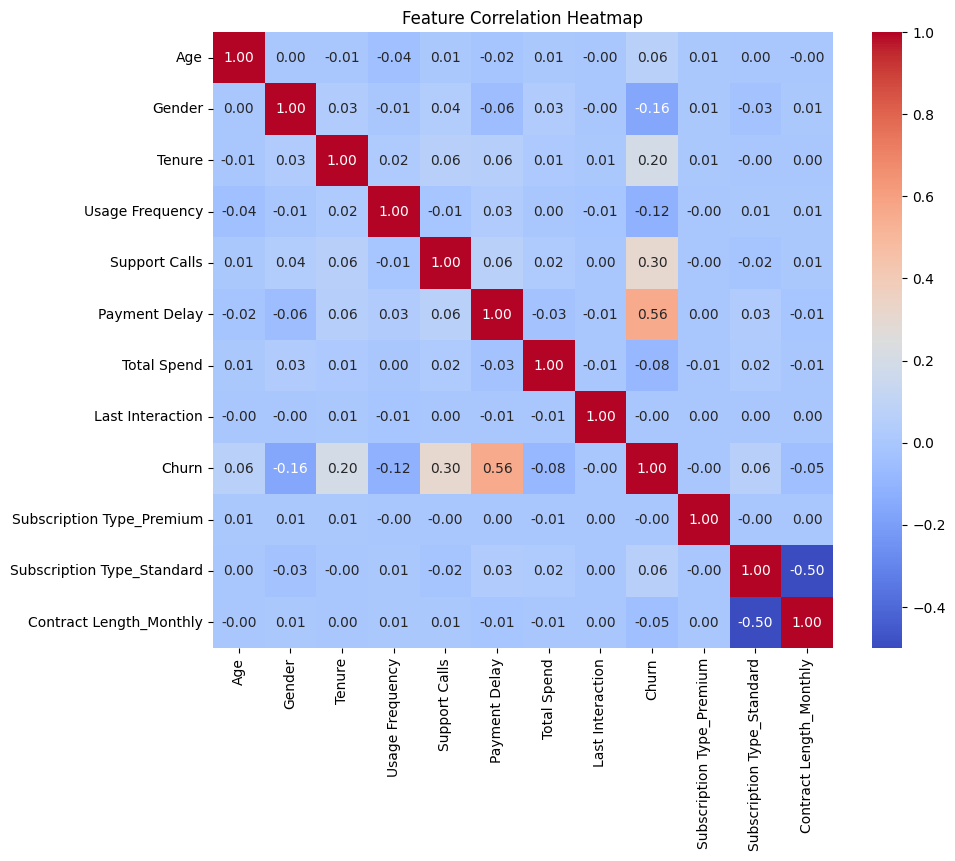

In [ ]:
df_features = pd.DataFrame(X, columns=df.columns[:-1]) # Exclude target column
df_features['Churn'] = y

df_features.hist(bins=30, figsize=(15, 10), grid=False)
plt.suptitle('Feature Distributions')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()